<img src="https://velog.velcdn.com/images/aerojohn1223/post/b0c13835-e803-4b5e-8c58-4b4555f6d42b/image.png" width="500px">

- **Reference**
    - https://velog.io/@aerojohn1223/Going-Deeper-with-ConvolutionsInceptionV1
    - https://github.com/MyungKyuYi/AI-class/blob/main/Variants_of_CNN
    - https://www.ytimes.co.kr/news/articleView.html?idxno=7149
    - https://arxiv.org/abs/1409.4842
    
GoogLeNet은 2014년 ILSVRC 대회에서 우승한 CNN 기반의 딥러닝 모델로, Inception 모듈을 통해 효율적으로 네트워크 깊이를 확장한 것이 특징이다. Inception 모듈은 서로 다른 크기의 필터(1x1, 3x3, 5x5)와 풀링 레이어를 병렬로 사용해 여러 스케일에서 특징을 추출한다. 이를 통해 매개변수 수를 줄이고 성능을 향상시킨다. GoogLeNet은 22개의 층을 포함하며, 네트워크 말단에 보조 분류기를 두어 학습을 안정화한다. 효율성과 정확도를 동시에 개선해 이후 딥러닝 모델 발전에 큰 영향을 미쳤다. GoogLeNet의 **장점**은 Inception 모듈 덕분에 다양한 크기의 필터로 여러 스케일에서 특징을 추출하여 **다양한 정보**를 학습할 수 있다는 점이다. 또한, **매개변수 수**를 크게 줄여 **모델 복잡도**를 낮추고, 계산량을 줄여 **효율성**을 높인다. **보조 분류기**를 추가해 **그래디언트 소실 문제**를 완화하고, 학습을 **안정화**할 수 있다

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy
from tqdm import tqdm

2024-10-12 12:40:19.830331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


---

In [3]:
# data load

df = pd.read_csv("../../data/PAMAP/PAMAP_features.csv")
df

Unnamed: 0  sub_id  activity_id act_level     hr_mean  hr_mean_normal  \
0            3006       2           17     light   87.000000        1.175676   
1            3497       2            4  moderate  124.605469        1.683858   
2           14495       7            5  vigorous  113.493430        1.891557   
3           13278       7           17     light   82.513672        1.375228   
4           14969       8            3     light   73.000000        1.106061   
...           ...     ...          ...       ...         ...             ...   
11768       10708       6            2     light   82.582031        1.376367   
11769        4870       3            2     light   76.998047        1.132324   
11770       11822       6            4  moderate   93.445312        1.557422   
11771        3866       2            7  moderate  129.160156        1.745408   
11772        3450       2           13  moderate  142.234375        1.922086   

         hr_std  hr_std_normal  hand_tmp_mean  hand_tmp_std  ...  \
0      0.000000   7.105427e-15      34.375000      0.000000  ...   
1      0.927920   1.253946e-02      31.875000      0.000000  ...   
2      2.315888   3.859813e-02      32.500000      0.000000  ...   
3      0.492657   8.210948e-03      33.812500      0.000000  ...   
4      0.000000   7.327472e-15      34.437500      0.000000  ...   
...         ...            ...            ...           ...  ...   
11768  0.930285   1.550475e-02      33.525635      0.030741  ...   
11769  0.806906   1.186626e-02      32.083130      0.029390  ...   
11770  0.493415   8.223580e-03      31.750000      0.000000  ...   
11771  0.361877   4.890232e-03      30.465576      0.031088  ...   
11772  1.714464   2.316843e-02      32.173340      0.026163  ...   

       ankle_acc_xz_cor  hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  \
0              0.233251        -0.472662         0.335516        -0.377507   
1             -0.119772        -0.287380        -0.230390        -0.491314   
2              0.025673        -0.265566         0.824691        -0.121345   
3              0.724061        -0.196728         0.315984        -0.380337   
4             -0.001651        -0.060776         0.165672         0.311760   
...                 ...              ...              ...              ...   
11768          0.193950        -0.354026         0.175876        -0.172933   
11769          0.135629         0.056979         0.008235         0.001093   
11770         -0.404942         0.520845        -0.951838        -0.561901   
11771         -0.136336        -0.147614        -0.344375        -0.329746   
11772          0.200755        -0.081262         0.130816        -0.278256   

       chest_gyr_xy_cor  chest_gyr_yz_cor  chest_gyr_xz_cor  ankle_gyr_xy_cor  \
0             -0.290138         -0.779952          0.071855         -0.305959   
1              0.011124         -0.799319         -0.135736         -0.653133   
2             -0.004923         -0.317761         -0.202148         -0.660278   
3              0.284190         -0.109078         -0.071734         -0.177813   
4             -0.272620         -0.014943         -0.191610         -0.261158   
...                 ...               ...               ...               ...   
11768          0.184131         -0.274344         -0.485489         -0.100010   
11769         -0.203294         -0.097797         -0.273316         -0.009717   
11770         -0.169119          0.299434         -0.100683         -0.555866   
11771         -0.024487         -0.536806         -0.161019         -0.752563   
11772         -0.254757         -0.723943         -0.039044         -0.016410   

       ankle_gyr_yz_cor  ankle_gyr_xz_cor  
0             -0.003001         -0.638866  
1             -0.654575          0.391363  
2             -0.528138          0.402147  
3              0.237828         -0.729771  
4              0.066954          0.057685  
...                 ...               ...  
11768      

In [4]:
# 각 feature의 이름
# https://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf

features_name = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

print (features_name)
print ()
df.info()

{0: 'transient', 1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11773 non-null  int64  
 1   sub_id            11773 non-null  int64  
 2   activity_id       11773 non-null  int64  
 3   act_level         11773 non-null  object 
 4   hr_mean           11773 non-null  float64
 5   hr_mean_normal    11773 non-null  float64
 6   hr_std            11773 non-null  float64
 7   hr_std_normal     11773 non-null  float64
 8   hand_tmp_mean     11773 non-null  float64
 9   hand_tmp_std   

In [5]:
# 결측치 제거

print (df.isnull().sum())

df = df.dropna()

print (df.isnull().sum())

Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hr_mean             0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 68, dtype: int64
Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hr_mean             0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 68, dtype: int64


In [6]:
# label encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['activity_id'] = LE.fit_transform(df['activity_id'])
df['act_level'] = LE.fit_transform(df['act_level'])

df

Unnamed: 0  sub_id  activity_id  act_level     hr_mean  hr_mean_normal  \
0            3006       2           10          0   87.000000        1.175676   
1            3497       2            3          1  124.605469        1.683858   
2           14495       7            4          2  113.493430        1.891557   
3           13278       7           10          0   82.513672        1.375228   
4           14969       8            2          0   73.000000        1.106061   
...           ...     ...          ...        ...         ...             ...   
11768       10708       6            1          0   82.582031        1.376367   
11769        4870       3            1          0   76.998047        1.132324   
11770       11822       6            3          1   93.445312        1.557422   
11771        3866       2            6          1  129.160156        1.745408   
11772        3450       2            8          1  142.234375        1.922086   

         hr_std  hr_std_normal  hand_tmp_mean  hand_tmp_std  ...  \
0      0.000000   7.105427e-15      34.375000      0.000000  ...   
1      0.927920   1.253946e-02      31.875000      0.000000  ...   
2      2.315888   3.859813e-02      32.500000      0.000000  ...   
3      0.492657   8.210948e-03      33.812500      0.000000  ...   
4      0.000000   7.327472e-15      34.437500      0.000000  ...   
...         ...            ...            ...           ...  ...   
11768  0.930285   1.550475e-02      33.525635      0.030741  ...   
11769  0.806906   1.186626e-02      32.083130      0.029390  ...   
11770  0.493415   8.223580e-03      31.750000      0.000000  ...   
11771  0.361877   4.890232e-03      30.465576      0.031088  ...   
11772  1.714464   2.316843e-02      32.173340      0.026163  ...   

       ankle_acc_xz_cor  hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  \
0              0.233251        -0.472662         0.335516        -0.377507   
1             -0.119772        -0.287380        -0.230390        -0.491314   
2              0.025673        -0.265566         0.824691        -0.121345   
3              0.724061        -0.196728         0.315984        -0.380337   
4             -0.001651        -0.060776         0.165672         0.311760   
...                 ...              ...              ...              ...   
11768          0.193950        -0.354026         0.175876        -0.172933   
11769          0.135629         0.056979         0.008235         0.001093   
11770         -0.404942         0.520845        -0.951838        -0.561901   
11771         -0.136336        -0.147614        -0.344375        -0.329746   
11772          0.200755        -0.081262         0.130816        -0.278256   

       chest_gyr_xy_cor  chest_gyr_yz_cor  chest_gyr_xz_cor  ankle_gyr_xy_cor  \
0             -0.290138         -0.779952          0.071855         -0.305959   
1              0.011124         -0.799319         -0.135736         -0.653133   
2             -0.004923         -0.317761         -0.202148         -0.660278   
3              0.284190         -0.109078         -0.071734         -0.177813   
4             -0.272620         -0.014943         -0.191610         -0.261158   
...                 ...               ...               ...               ...   
11768          0.184131         -0.274344         -0.485489         -0.100010   
11769         -0.203294         -0.097797         -0.273316         -0.009717   
11770         -0.169119          0.299434         -0.100683         -0.555866   
11771         -0.024487         -0.536806         -0.161019         -0.752563   
11772         -0.254757         -0.723943         -0.039044         -0.016410   

       ankle_gyr_yz_cor  ankle_gyr_xz_cor  
0             -0.003001         -0.638866  
1             -0.654575          0.391363  
2             -0.528138          0.402147  
3              0.237828         -0.729771  
4              0.066954          0.057685  
...                 ...               ...  

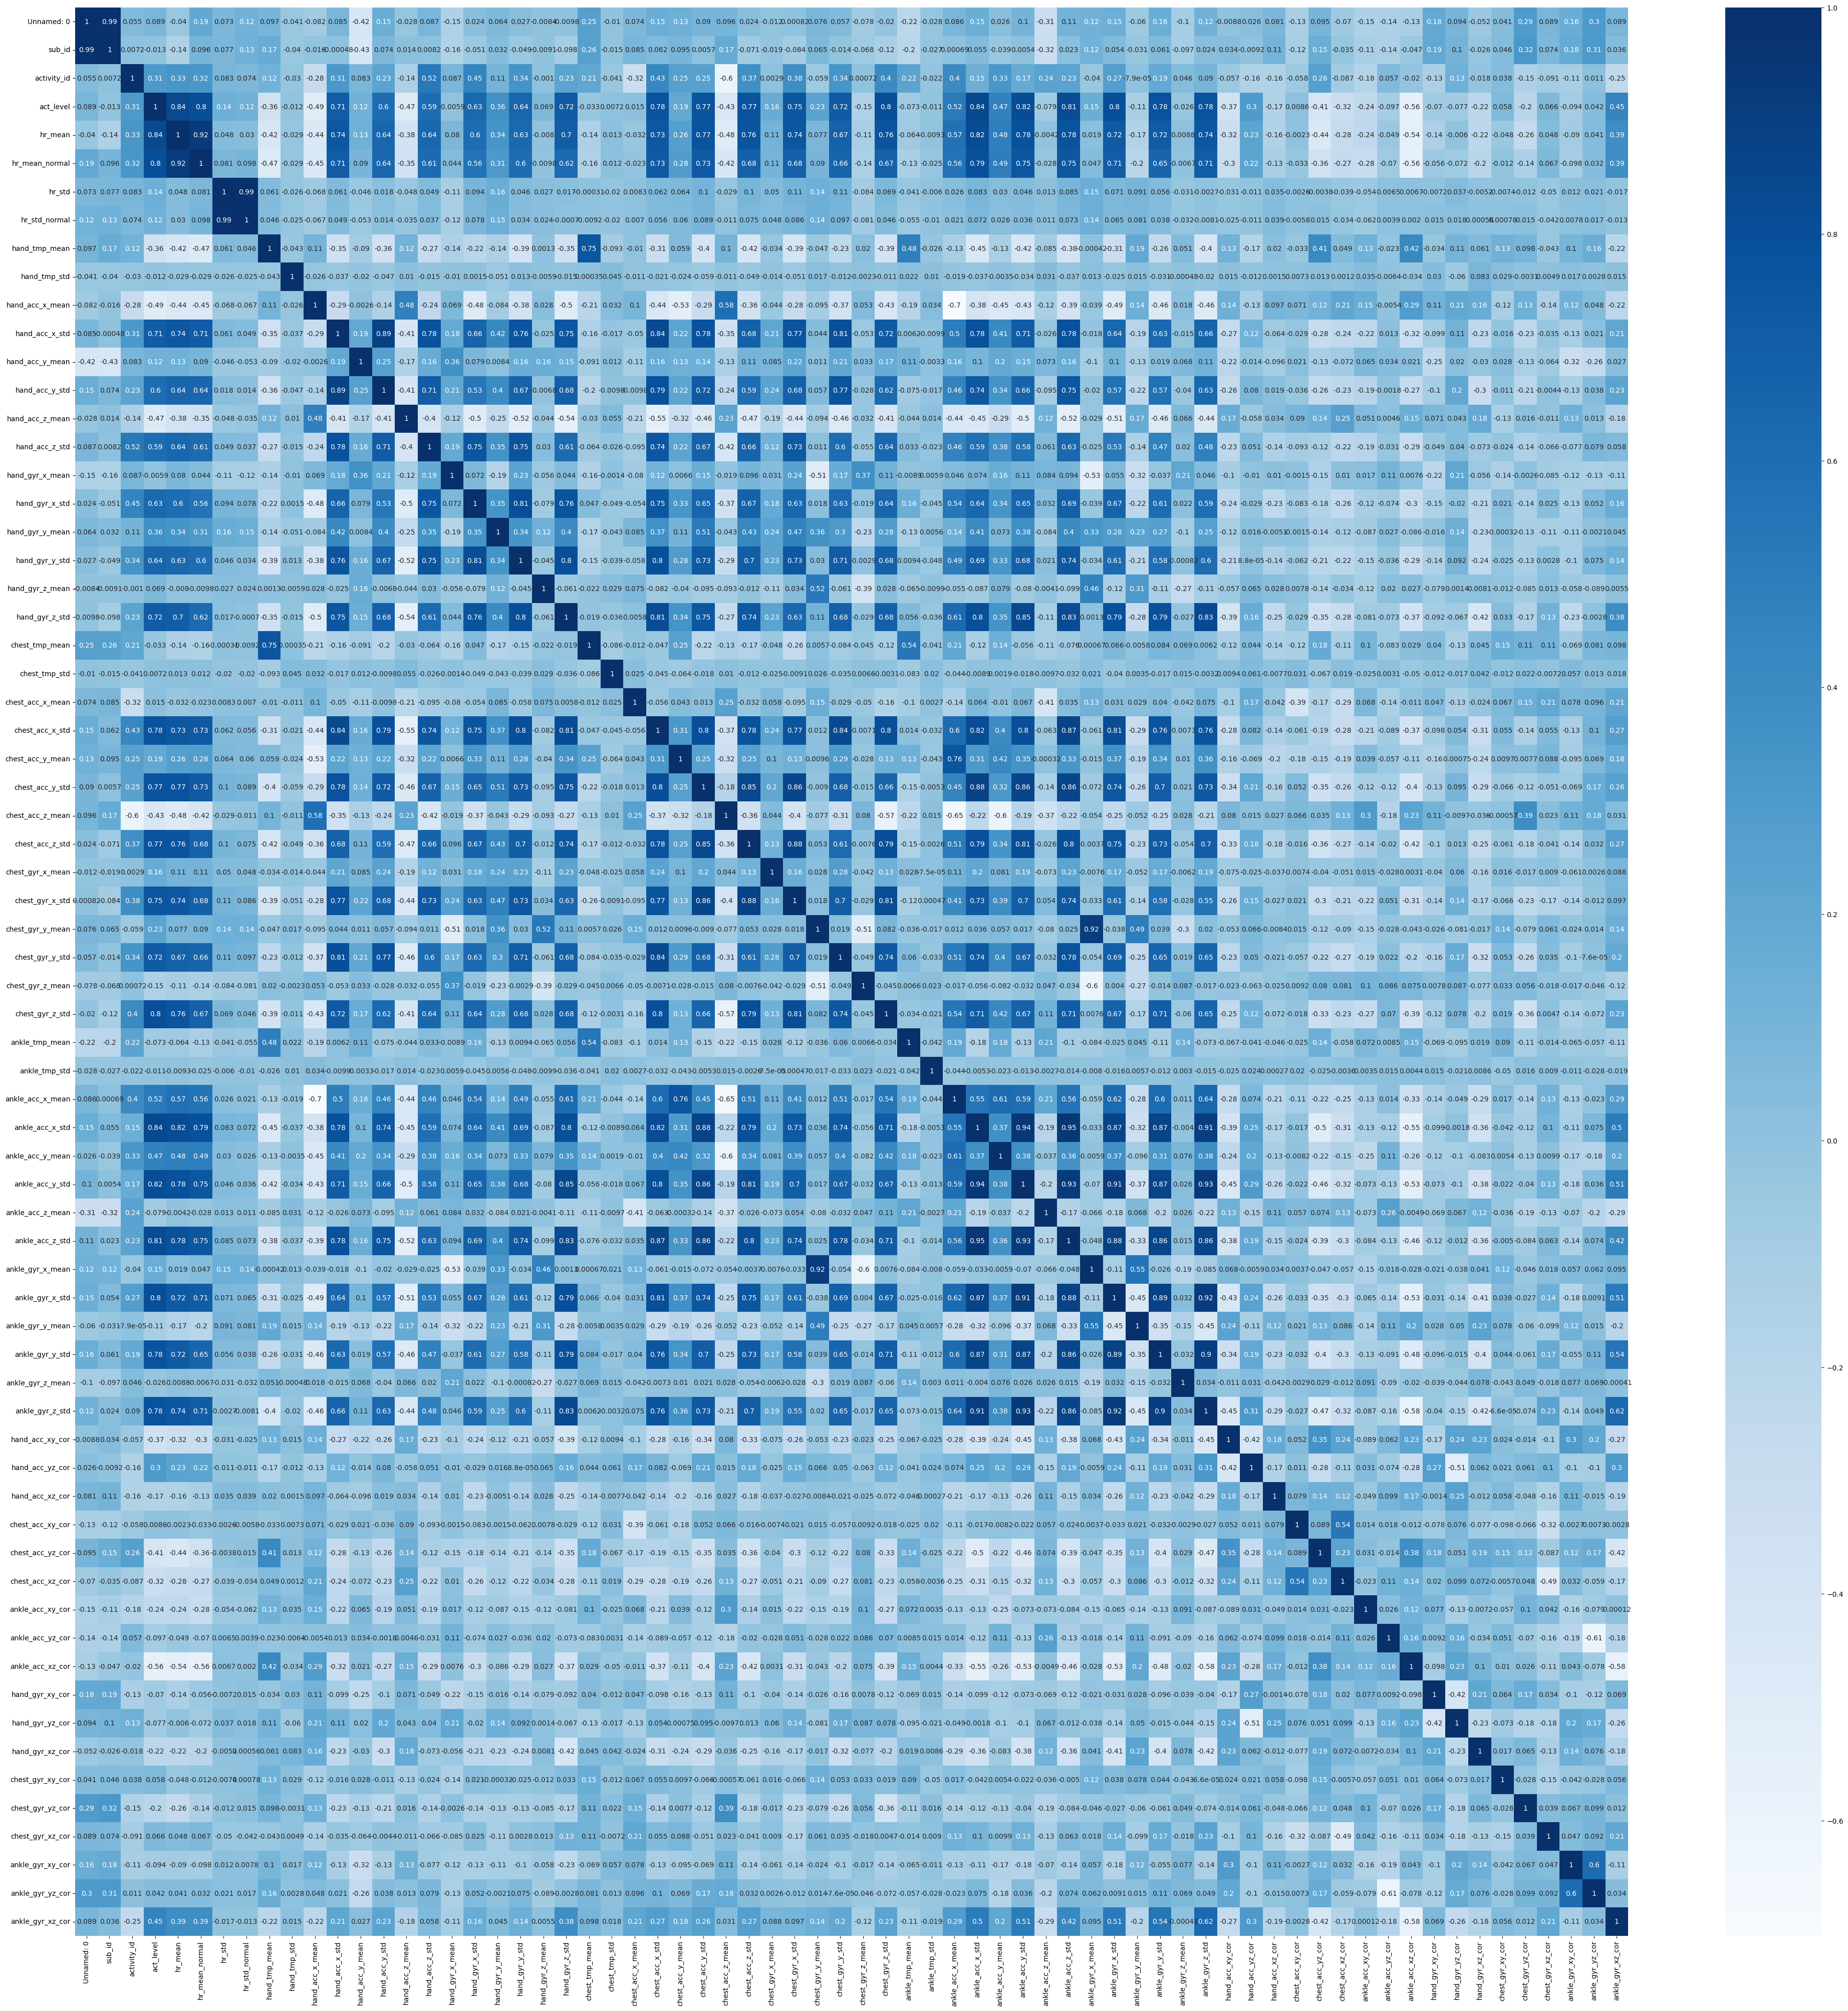

In [7]:
# heatmap visulization

plt.figure(figsize=(50, 50))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Blues', annot_kws={"size": 10})
plt.show()

In [8]:
# 필요없는 열 제거

df = df.drop(['Unnamed: 0',
              'sub_id',
              'act_level',
              'hr_mean',
              'hr_mean_normal',
              'hr_std',
              'hr_std_normal'], axis = 1)

# PAMAP_input = df.drop(['activity_id'], axis = 1) 
# PAMAP_target = df['activity_id'] # activity_id를 예측하는 문제

# print (PAMAP_input.shape, PAMAP_target.shape)

In [9]:
# 상관관계가 낮은 8개 열 제거 (복잡성 줄이기 위해)

correlation_matrix = df.corr()
mean_corr = correlation_matrix.abs().mean().sort_values()
low_corr_columns = mean_corr.index[:8]
df = df.drop(low_corr_columns, axis=1)

df.shape

(11773, 53)

In [10]:
# target에 포함된 요소들 확인하기

print (df['activity_id'].unique())


'''
    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.
    (labelencoding)
'''

[10  3  4  2  5  1  6  9  7  0  8 11]


'\n    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.\n    (labelencoding)\n'

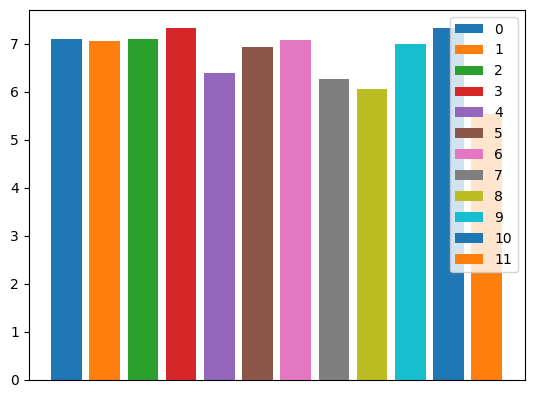

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64


In [11]:
# activity_id의 countplot, value_count

import math

target = np.unique(df['activity_id'])

# 시각화 진행

width = 1
for compo in target : 
    plt.bar(width, math.log(len(df[df['activity_id'] == compo])), 
            label=compo)
    width += 1
    
plt.xticks([], [])

plt.legend()
plt.show()

print (df['activity_id'].value_counts())

In [12]:

'''
    oversampling과 undersampling을 함수로 구현한다. 
'''
    
def sampling(df, target_col, max_size) :
    # 결과를 저장할 리스트 
    dfs = []
    
    for label in df[target_col].unique() :
        class_df = df[df[target_col] == label]
        
        if len(class_df) < max_size :
            # 샘플 수가 max_size보다 적으면 데이터를 복제하여 max_size로 만듦
            sampled_df = class_df.sample(max_size, replace=True, random_state=42)
        else :
            # 샘플 수가 max_size보다 많으면 앞부분부터 max_size만큼 선택함
            sampled_df = class_df.head(max_size)
        
        # 리스트에 추가
        dfs.append(sampled_df)
    
    df_resampled = pd.concat(dfs).reset_index(drop=True)
    
    return df_resampled

df_resampled = sampling(df, 'activity_id', max_size=5000)
print (df_resampled['activity_id'].value_counts())

activity_id
10    5000
3     5000
4     5000
2     5000
5     5000
1     5000
6     5000
9     5000
7     5000
0     5000
8     5000
11    5000
Name: count, dtype: int64


In [13]:
# Z-score normalization을 진행한다.

from sklearn.preprocessing import StandardScaler

X = df_resampled[[feature_name for feature_name in df_resampled.columns if feature_name != 'activity_id']]
y = df_resampled['activity_id']

SS = StandardScaler()
X = SS.fit_transform(X)

scaled_df = pd.DataFrame(data=X, 
                        columns = [feature_name for feature_name in df.columns if feature_name != 'activity_id'])
scaled_df['activity_id'] = y

scaled_df 

hand_tmp_mean  hand_acc_x_mean  hand_acc_x_std  hand_acc_y_mean  \
0           0.527898        -0.044816       -0.762108         0.765312   
1           0.940570         0.969473       -0.251097         0.644073   
2           0.777537        -0.239336       -0.569838        -0.270210   
3           0.153440         0.147068       -0.235050         0.731867   
4           0.559103         0.095370       -0.799334        -0.637938   
...              ...              ...             ...              ...   
59995      -1.157164        -0.186185        1.595995         1.033103   
59996       0.654424        -0.013637        1.293858         0.868660   
59997      -1.157164        -0.373120        0.973337         0.866579   
59998      -1.157164         0.022779        1.373668         1.110390   
59999      -3.715962         0.763889        0.270761         1.220101   

       hand_acc_y_std  hand_acc_z_mean  hand_acc_z_std  hand_gyr_x_mean  \
0           -0.482107        -0.127809       -0.314787        -0.122158   
1           -0.333091         0.920250       -0.255443         0.040868   
2           -0.148454         1.124756       -0.243076        -0.199861   
3           -0.240622        -0.025017        0.333309        -0.158172   
4           -0.398449         1.607094       -0.818488        -0.020964   
...               ...              ...             ...              ...   
59995        0.422174        -0.618533        1.417111         1.149277   
59996        1.220307        -0.881265        2.368193         0.507456   
59997        0.418600        -0.296487        1.566516         1.540726   
59998        0.472420        -0.472215        1.321416         2.095630   
59999        1.403727        -1.282617        1.885651         1.190166   

       hand_gyr_x_std  hand_gyr_y_mean  ...  ankle_acc_xz_cor  \
0           -0.189911        -0.138028  ...          0.745353   
1           -0.094257        -0.346445  ...          1.234475   
2            0.204090        -0.060375  ...          1.192204   
3            0.555950        -0.674327  ...          1.181053   
4           -0.872833        -0.293721  ...          1.409421   
...               ...              ...  ...               ...   
59995        0.895944         0.527583  ...         -1.001085   
59996        2.254324         0.982301  ...         -1.219991   
59997        0.776100         1.679993  ...         -0.784365   
59998        0.855658         1.263174  ...         -1.130238   
59999        0.689969        -0.470309  ...         -1.923601   

       hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  chest_gyr_yz_cor  \
0            -0.824033        -0.222055         1.997304          0.117835   
1            -0.313027         0.282719         0.485668         -1.906989   
2            -1.923821         1.101581        -1.193029         -0.923415   
3            -1.024990         1.271741         0.629128         -0.729675   
4            -0.919179         1.011423        -1.602723         -0.352294   
...                ...              ...              ...               ...   
59995        -0.886228         0.889203         0.742467          0.459232   
59996        -2.112127         0.448552        -0.585923          0.748718   
59997        -1.281992         0.251409         0.635452          0.525027   
59998        -0.947146         0.355464         1.106940          0.407651   
59999        -0.665361         0.948307        -0.943239          0.759458   

       chest_gyr_xz_cor  ankle_gyr_xy_cor  ankle_gyr_yz_cor  ankle_gyr_xz_cor  \
0              0.022973         -0.180623         -0.512241          0.422379   
1              2.781428         -0.272818          0.470489         -0.559575   
2             -0.725131          0.560882         -0.556085         -1.607795   
3             -1.816482         -1.230121         -0.112650         -0.930112   
4              0.819493         -0.338989         -0.002148         -1.797672   
...          

In [14]:
# input, target split

input_PAMAP = df_resampled.drop('activity_id', axis=1)
target_PAMAP = df_resampled['activity_id']

input_PAMAP.shape, target_PAMAP.shape

((60000, 52), (60000,))

In [15]:
# train, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_PAMAP,
                                                    target_PAMAP,
                                                    stratify=target_PAMAP,
                                                    test_size = 0.2, shuffle=True) 

# X_train, X_val, y_train, y_val = train_test_split(X_train,
#                                                     y_train,
#                                                     stratify=y_train,
#                                                     test_size = 0.2, shuffle=True) 

X_train.shape, X_test.shape

((48000, 52), (12000, 52))

In [16]:
# train, test reshape
# DataFrame을 NumPy 배열로 변환한 후 reshape
X_train = X_train.values.reshape(-1, 13, 4)
X_test = X_test.values.reshape(-1, 13, 4)

In [17]:
# one-hot encoding 

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=12)
y_test_encoded = to_categorical(y_test, num_classes=12)

print(y_train[:5])  
print(y_train_encoded[:5]) 

print(y_test[:5])  
print(y_test_encoded[:5])

# print(y_val_seq[:5])  
# print(y_val_seq_encoded[:5])

58765    11
19765     2
19313     2
46726     0
16592     2
Name: activity_id, dtype: int64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
8977     3
32853    6
22936    5
46873    0
28091    1
Name: activity_id, dtype: int64
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


-----

In [18]:
def inception_1d(x, filters):
    # Inception module implementation
    filter1, (filter2_a, filter2_b), (filter3_a, filter3_b), filter4 = filters
    
    branch1 = Conv1D(filters=filter1, kernel_size=1, padding='same', activation='relu')(x)

    branch2 = Conv1D(filters=filter2_a, kernel_size=1, padding='same', activation='relu')(x)
    branch2 = Conv1D(filters=filter2_b, kernel_size=3, padding='same', activation='relu')(branch2)

    branch3 = Conv1D(filters=filter3_a, kernel_size=1, padding='same', activation='relu')(x)
    branch3 = Conv1D(filters=filter3_b, kernel_size=5, padding='same', activation='relu')(branch3)

    branch4 = MaxPooling1D(pool_size=1, strides=1, padding='same')(x)
    branch4 = Conv1D(filters=filter4, kernel_size=1, padding='same', activation='relu')(branch4)

    outputs = [branch1, branch2, branch3, branch4]
    return Concatenate(axis=-1)(outputs)

In [19]:
def auxiliary_1d(x, name=None):
    layer = AveragePooling1D(pool_size=2, strides=2, padding='same')(x)  # pool_size 및 strides 조정
    layer = Conv1D(128, kernel_size=1, strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(256, activation='relu')(layer)
    output = Dense(12, activation='softmax', name=name)(layer)
    return output

In [20]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dropout, Dense, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


def GoogleNet_1D():
    layer_in = Input(shape=(13, 4))  # (timesteps, features)

    # stage-1
    layer = Conv1D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling1D(pool_size=3, strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv1D(filters=64, kernel_size=1, strides=1, padding='same', activation='relu')(layer)
    layer = Conv1D(filters=192, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling1D(pool_size=3, strides=2, padding='same')(layer)

    # stage-3
    layer = inception_1d(layer, [64, (96, 128), (16, 32), 32])  # 3a
    layer = inception_1d(layer, [128, (128, 192), (32, 96), 64])  # 3b
    layer = MaxPooling1D(pool_size=3, strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception_1d(layer, [192, (96, 208), (16, 48), 64])  # 4a
    aux1 = auxiliary_1d(layer, name='aux1')
    layer = inception_1d(layer, [160, (112, 224), (24, 64), 64])  # 4b
    layer = inception_1d(layer, [128, (128, 256), (24, 64), 64])  # 4c
    layer = inception_1d(layer, [112, (144, 288), (32, 64), 64])  # 4d
    aux2 = auxiliary_1d(layer, name='aux2')
    layer = inception_1d(layer, [256, (160, 320), (32, 128), 128])  # 4e
    layer = MaxPooling1D(pool_size=3, strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception_1d(layer, [256, (160, 320), (32, 128), 128])  # 5a
    layer = inception_1d(layer, [384, (192, 384), (48, 128), 128])  # 5b
    
    # stage-6
    layer = AveragePooling1D(pool_size=2, strides=2, padding='same')(layer)  # pool_size 및 strides 조정
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='relu')(layer)
    main = Dense(units=12, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])

    return model

GoogLeNet = GoogleNet_1D()

GoogLeNet.summary()
plot_model(GoogLeNet, 
           show_shapes=True, show_layer_activations=True, 
           show_dtype=True, show_layer_names=True, show_trainable=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 13, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 7, 64)     │      1,856 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 4, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4, 64)     │        256 │ max_pooling1d[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 4, 64)     │      4,160 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 4, 192)    │     37,056 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 192)    │        768 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 2, 192)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 2, 96)     │     18,528 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 2, 16)     │      3,088 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 2, 192)    │          0 │ max_pooling1d_1[… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 2, 64)     │     12,352 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 2, 128)    │     36,992 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 2, 32)     │      2,592 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 2, 32)     │      6,176 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2, 256)    │          0 │ conv1d_3[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_5[0][0],   │
│                     │                   │            │ conv1d_7[0][0],   │
│                     │                   │            │ conv1d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 2, 128)    │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 2, 32)     │      8,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 2, 256)    │          0 │ concatenate[0][0] │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 2, 128)    │     32,896 │ concatenate[0][0

 Total params: 3,894,420 (14.86 MB)

 Trainable params: 3,893,908 (14.85 MB)

 Non-trainable params: 512 (2.00 KB)

In [21]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
GoogLeNet.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 'accuracy', 'accuracy'])  # 각 출력에 대한 metric 설정

In [22]:
# fit

from memory_profiler import profile

@profile  # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X, y):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

    history = model.fit(X_train, [y_train_encoded, y_train_encoded, y_train_encoded], epochs=10, 
                    validation_split=0.2, batch_size=256, callbacks=[early_stopping_cb], 
                    verbose=True, shuffle=True)

    
    return history

history = train_model(GoogLeNet, X_train, y_train_encoded)


ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_6829/3956575955.py
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 125ms/step - aux1_accuracy: 0.6884 - aux1_loss: 1.2466 - aux2_accuracy: 0.5712 - aux2_loss: 1.5105 - loss: 4.2371 - main_accuracy: 0.4613 - main_loss: 1.4800 - val_aux1_accuracy: 0.7480 - val_aux1_loss: 1.0355 - val_aux2_accuracy: 0.8136 - val_aux2_loss: 0.8465 - val_loss: 2.4809 - val_main_accuracy: 0.8033 - val_main_loss: 0.5989
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - aux1_accuracy: 0.9836 - aux1_loss: 0.0588 - aux2_accuracy: 0.9835 - aux2_loss: 0.0548 - loss: 0.1813 - main_accuracy: 0.9775 - main_loss: 0.0676 - val_aux1_accuracy: 0.9754 - val_aux1_loss: 0.1838 - val_aux2_accuracy: 0.9790 - val_aux2_loss: 0.1328 - val_loss: 0.4113 - val_main_accuracy: 0.9746 - val_main_loss: 0.0957
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - aux1_accuracy: 0.9924 - aux1_loss: 0.0255 - aux2_accuracy: 0.9927 - aux2_loss: 0.022

{'aux1_accuracy': [0.8608593940734863, 0.9869791865348816, 0.9940885305404663, 0.997057318687439, 0.9978125095367432, 0.9988541603088379, 0.9989843964576721, 0.9991666674613953, 0.9993749856948853, 0.9997395873069763], 'aux1_loss': [0.5943297743797302, 0.04740678146481514, 0.02221006713807583, 0.012143769301474094, 0.008510728366672993, 0.005680939648300409, 0.004572133533656597, 0.003293047659099102, 0.0024456449318677187, 0.0014366473769769073], 'aux2_accuracy': [0.7970052361488342, 0.9867708086967468, 0.99393230676651, 0.9967187643051147, 0.9973437786102295, 0.9983593821525574, 0.9985156059265137, 0.9988020658493042, 0.9991666674613953, 0.9997656345367432], 'aux2_loss': [0.745063304901123, 0.04456975683569908, 0.019960837438702583, 0.010650577954947948, 0.008629496209323406, 0.005437033250927925, 0.005017376504838467, 0.0037580847274512053, 0.0025325750466436148, 0.0011149798519909382], 'loss': [2.066993474960327, 0.14737750589847565, 0.06604707986116409, 0.03597893565893173, 0.0286

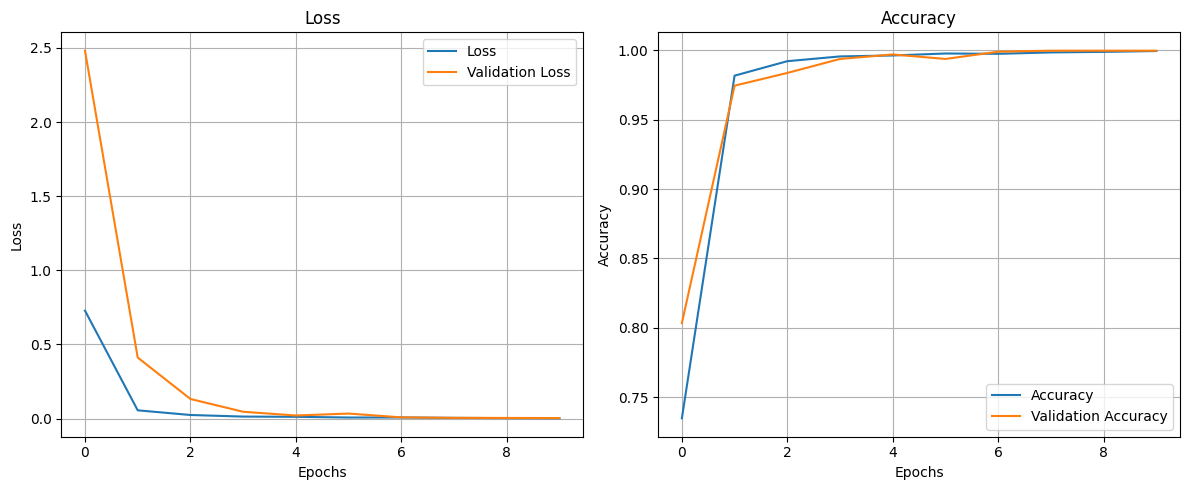

In [23]:
# loss와 validation loss, acc와 validation acc를 시각화하기 위한 메소드

print (history.history)

def draw_history (history) :
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(history.history['main_loss'], label='Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(history.history['main_accuracy'], label='Accuracy')
    ax[1].plot(history.history['val_main_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

draw_history(history)

In [24]:
# evaulate

print ("train score : ", GoogLeNet.evaluate(X_train, y_train_encoded))
print ("test score : ", GoogLeNet.evaluate(X_test, y_test_encoded))

eval = GoogLeNet.evaluate(X_test, y_test_encoded)

print(eval)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - aux1_accuracy: 0.0000e+00 - aux1_loss: 0.0000e+00 - aux2_accuracy: 0.0000e+00 - aux2_loss: 0.0000e+00 - loss: 2.5667e-04 - main_accuracy: 1.0000 - main_loss: 2.5667e-04
train score :  [0.00040676831849850714, 0.00040676831849850714, 0.0, 0.0, 0.0, 0.0, 0.9998958110809326]
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - aux1_accuracy: 0.0000e+00 - aux1_loss: 0.0000e+00 - aux2_accuracy: 0.0000e+00 - aux2_loss: 0.0000e+00 - loss: 3.4170e-04 - main_accuracy: 1.0000 - main_loss: 3.4170e-04
test score :  [0.0003624215896707028, 0.0003624215896707028, 0.0, 0.0, 0.0, 0.0, 1.0]
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - aux1_accuracy: 0.0000e+00 - aux1_loss: 0.0000e+00 - aux2_accuracy: 0.0000e+00 - aux2_loss: 0.0000e+00 - loss: 3.4170e-04 - main_accuracy: 1.0000 - main_loss: 3.4170e-04
[0.0003624215896707028, 0.0003624215896707028, 0.0, 0.0, 0.0, 0.0, 1.0]


In [25]:
# 모델 저장

from tensorflow.keras.models import save_model

def save_trained_model(model, model_name, dataset_name) :
    # 모델 저장 경로 설정
    model_dir = './model'
    os.makedirs(model_dir, exist_ok=True)
    
    # 모델 파일 경로
    model_name = f"{model_name}_{dataset_name}.h5"  # 모델 이름과 데이터셋 이름 조합
    model_path = os.path.join(model_dir, model_name)
    
    # 모델 저장
    save_model(model, model_path)
    print(f'Model saved at {model_path}')

save_trained_model(GoogLeNet, "GoogLeNet", "PAMAP")

Model saved at ./model/GoogLeNet_PAMAP.h5
